In [17]:
import copy

import numpy as np
import matplotlib.pyplot as plt

from centrex_trajectories import Coordinates, Velocities, propagate_trajectories
from centrex_trajectories.particles import TlF
from centrex_trajectories.beamline_objects import (
    Section,
    ElectrostaticQuadrupoleLens,
    Bore,
)
from centrex_trajectories.random_generation import (
    generate_random_coordinates_uniform_circle,
    generate_random_velocities_normal,
)

plt.rcParams.update({"font.size": 14})


In [18]:
in_to_m = 25.4e-3
R = 1.75 * in_to_m / 2
lens_offset = 3e-3
n_trajectories = 50
particle = TlF()

lens_length = 2.0


In [19]:
eql = ElectrostaticQuadrupoleLens(
    name="EQL",
    objects=[Bore(0, 0, 0.1, lens_length, R)],
    start=0.1,
    stop=0.1 + lens_length,
    V=30_000,
    R=R,
    x=0,
    y=0,
)

eql_offset = ElectrostaticQuadrupoleLens(
    name="EQL",
    objects=[Bore(x=0, y=lens_offset, z=0.1, length=lens_length, radius=R)],
    start=0.1,
    stop=0.1 + lens_length,
    V=30_000,
    R=R,
    x=0,
    y=lens_offset,
)

det = Section(
    name="DET",
    objects=[],
    start=0.1 + lens_length,
    stop=0.1 + lens_length + 0.3,
    save_collisions=False,
)

sections = [eql, det]
sections_offset = [eql_offset, det]


In [20]:
coords = generate_random_coordinates_uniform_circle(5e-3, n_trajectories)

coords_offset = copy.deepcopy(coords)
coords_offset.y += lens_offset

velocities = generate_random_velocities_normal(
    vx=0.0,
    vy=0.0,
    vz=184.0,
    sigma_vx=2.0,
    sigma_vy=2.0,
    sigma_vz=16.5,
    number=n_trajectories,
)

# coords = Coordinates(
#     np.zeros(n_trajectories),
#     np.zeros(n_trajectories),
#     np.zeros(n_trajectories),
# )
# coords_offset = copy.deepcopy(coords)
# coords_offset.y += lens_offset

# velocities = Velocities(
#     np.zeros(n_trajectories), np.zeros(n_trajectories), np.ones(n_trajectories) * 184
# )


In [21]:
section_data, trajectories = propagate_trajectories(
    sections, coords, velocities, particle
)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.0s finished


In [22]:
section_data_offset, trajectories_offset = propagate_trajectories(
    sections_offset, coords_offset, velocities, particle
)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.0s finished


In [23]:
section_data

[SectionData(name='EQL', saved_collisions=[], nr_collisions=np.int64(10), nr_trajectories=50, survived=np.int64(40), throughput=np.float64(0.8)),
 SectionData(name='DET', saved_collisions=[], nr_collisions=np.int64(0), nr_trajectories=40, survived=np.int64(40), throughput=np.float64(1.0))]

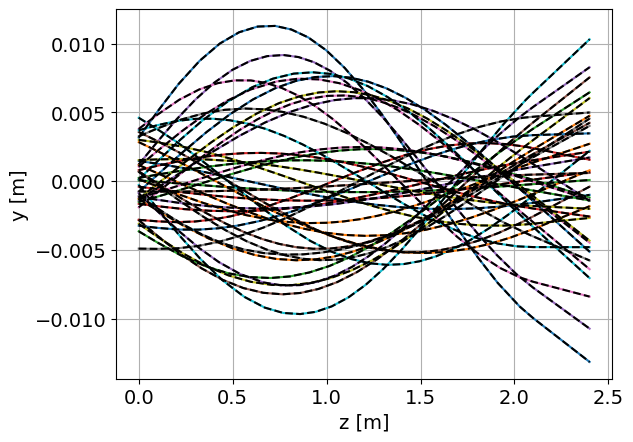

In [24]:
fig, ax = plt.subplots()

for traj in trajectories.values():
    ax.plot(traj.z, traj.y)


for traj in trajectories_offset.values():
    ax.plot(traj.z, traj.y - lens_offset, color="k", ls="--")

ax.set_xlabel("z [m]")
ax.set_ylabel("y [m]")
ax.grid()
